<a href="https://colab.research.google.com/github/Daniil-Khlyvniuk/python_math/blob/main/Predator_Prey_Population_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: **"Predator-Prey Population Modeling"**

## Description:
Create an application that simulates the population dynamics of two species: a predator and its prey, using the [Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) equations. This is a classic model of interaction between species, described by a system of differential equations.

## Main Tasks:
  1. **Population Modeling**: The model is described by two differential equations:
  - change in the prey population (e.g., rabsbits):

  $$\frac{dx}{dt} = \alpha x - \beta x y$$


  - change in the predator population (e.g., foxes).

  $$ \frac{dy}{dt} = \delta x y - \gamma y \ $$


   - Where:
    - the population of prey:
      $$ x(t) $$

    - the population of predators:
      $$ y(t) $$

    - the prey birth rate:
      $$ alpha $$

    - the rate at which predators eat prey:
      $$ beta $$
   
    - the death rate of predators in the absence of food:
      $$ gamma $$
   
    - the rate of predator reproduction depending on the number of prey eaten:
      $$ delta $$

2. **User Interface**: The user should be able to adjust initial model parameters, such as prey and predator birth rates, mortality, and interaction rates.

3. **Visualization**: Plot graphs showing the change in predator and prey populations over time. You can display two separate graphs, one for each population, or a combined graph showing both populations together.

4. **Development Scenarios**: Implement different scenarios in the application — for instance, what happens to the populations if predators are exterminated, or if prey has an abundance of food.

____


In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
PARAMS = {
  'x': 40,                                 # Initial prey population
  'y': 9,                                  # Initial predator population
  'alpha': 0.1,                            # Prey birth rate
  'beta': 0.02,                            # Predation rate
  'delta': 0.01,                           # Predator reproduction rate
  'gamma': 0.1,                            # Predator death rate
  'dt': 0.1,                               # Time step
}

time = np.arange(0, 200, PARAMS['dt'])     # Total time

In [118]:
def symulate_loop():
  x = PARAMS['x']
  y = PARAMS['y']

  prey_population = []
  predator_population = []


  for t in time:
    prey_population.append(x)
    predator_population.append(y)

    dxdt = PARAMS['alpha'] * x - PARAMS['beta'] * x * y
    dydt = PARAMS['delta'] * x * y -  PARAMS['gamma'] * y

    x += dxdt * PARAMS['dt']
    y += dydt * PARAMS['dt']

  return prey_population, predator_population


In [119]:
prey_population, predator_population = symulate_loop()

prey_population = np.array(prey_population)
predator_population = np.array(predator_population)

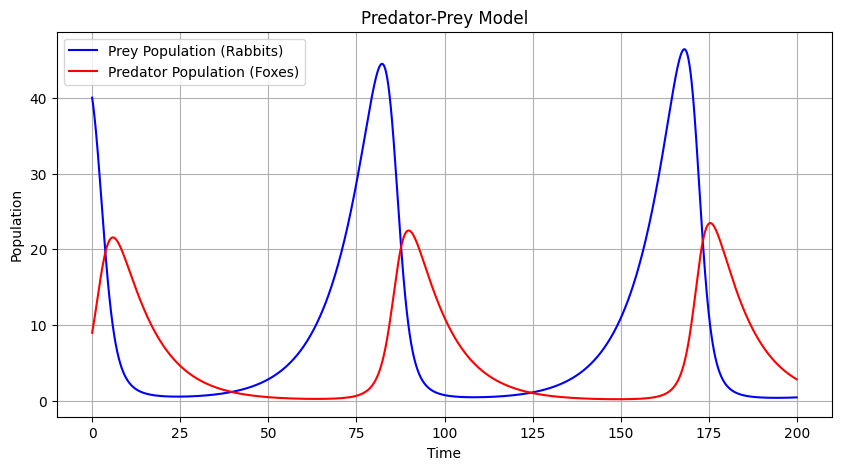

In [120]:
plt.figure(figsize=(10, 5))
plt.plot(time, prey_population, label='Prey Population (Rabbits)', color='b')
plt.plot(time, predator_population, label='Predator Population (Foxes)', color='r')
plt.title('Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

### Additional Features:
- **Seasonal Changes**: Add a feature that accounts for seasonal fluctuations in resources or environment (e.g., predators have less food in winter and more in summer).
- **Adaptive Populations**: Make populations more "intelligent" by introducing the ability to adapt to new conditions (e.g., predators increase their birth rate when prey is plentiful).
- **Spatial Modeling**: Expand the model to consider geographical movements of predators and prey across a map (e.g., adding migration patterns).

### Why It’s Interesting:
This project applies a system of differential equations to simulate real-world natural processes. It helps understand how predators and prey interact in nature, with potential to experiment with different parameters and scenarios.

In [121]:
def seasonal_effect(t):
    """Returns a factor for seasonal effects."""
    if (t // 30) % 2 == 0:         # Summer (0-29, 60-89, 120-149, ...)
        return 1.2                 # Higher birth rate in summer
    else:                          # Winter (30-59, 90-119, 150-179, ...)
        return 0.8                 # Lower birth rate in winterm

In [122]:
def symulate_loop_with_seasons_effects():
  x = PARAMS['x']
  y = PARAMS['y']

  prey_population = []
  predator_population = []

  for t in time:
    prey_population.append(x)
    predator_population.append(y)

    # Seasonal effect
    season_factor = seasonal_effect(int(t))

    # Adaptive predator reproduction based on prey population
    adaptive_delta = PARAMS['delta'] + (0.005 * x / (x + 1))       # Increase with prey population

    # Update populations using Lotka-Volterra equations with seasonal changes
    dxdt = (PARAMS['alpha'] * season_factor) * x - PARAMS['beta'] * x * y
    dydt = adaptive_delta * x * y - PARAMS['gamma'] * y

    x += dxdt * PARAMS['dt']
    y += dydt * PARAMS['dt']

  return prey_population, predator_population



In [123]:
prey_population, predator_population = symulate_loop_with_seasons_effects()

prey_population = np.array(prey_population)
predator_population = np.array(predator_population)

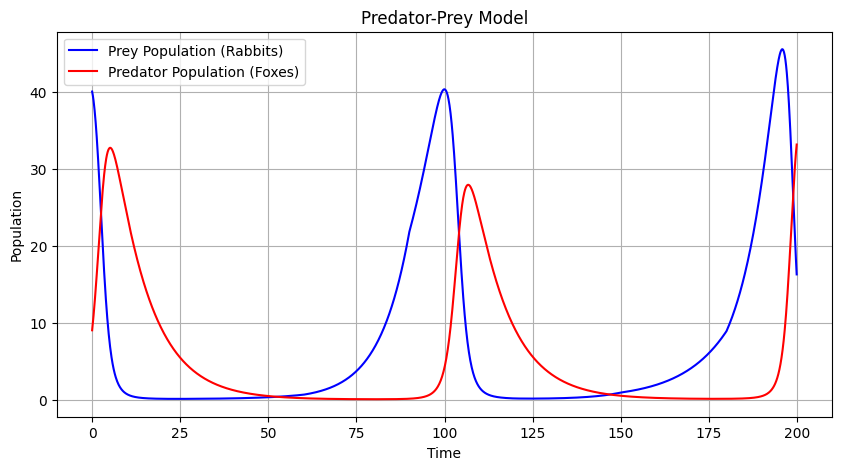

In [124]:
plt.figure(figsize=(10, 5))
plt.plot(time, prey_population, label='Prey Population (Rabbits)', color='b')
plt.plot(time, predator_population, label='Predator Population (Foxes)', color='r')
plt.title('Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

## Finding a balance in a predator-prey model involves tuning parameters so that both populations can coexist sustainably over time.


In [198]:
def symulate_loop_finde_balance():
  Kx = 100  # Carrying capacity for prey.The environment can support a maximum of 100 prey individuals.
  Ky = 20   # Carrying capacity for predators. The environment can support a maximum of 20 predator individuals.

  x = PARAMS['x']
  y = PARAMS['y']

  prey_population = []
  predator_population = []

  for t in time:
    prey_population.append(x)
    predator_population.append(y)

    season_factor = seasonal_effect(int(t))
    adaptive_delta = PARAMS['delta'] + (0.005 * x / (x + 1))

    dxdt = (PARAMS['alpha'] * season_factor * x * (1 - x/Kx)) - (PARAMS['beta'] * x * y)
    dydt = (adaptive_delta * x * y * (1 - y/Ky)) - (PARAMS['gamma'] * y)

    x += dxdt * PARAMS['dt']
    y += dydt * PARAMS['dt']

  return prey_population, predator_population


In [199]:
prey_population, predator_population = symulate_loop_finde_balance()

prey_population = np.array(prey_population)
predator_population = np.array(predator_population)

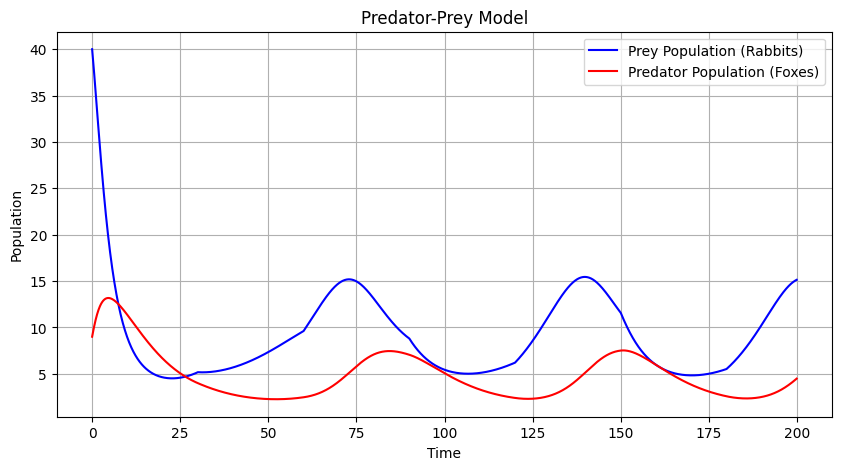

In [200]:
plt.figure(figsize=(10, 5))
plt.plot(time, prey_population, label='Prey Population (Rabbits)', color='b')
plt.plot(time, predator_population, label='Predator Population (Foxes)', color='r')
plt.title('Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()